In [80]:
import seaborn as sns
sns.set_context("talk", font_scale=1.4)
sns.set_style("white")
import data_modeler as dm
import importlib
importlib.reload(dm)

<module 'data_modeler' from '/Users/brad/Documents/Scripts/flatiron/fis-mod4-project/data_modeler.py'>

In [2]:
df = dm.load_dataframe()

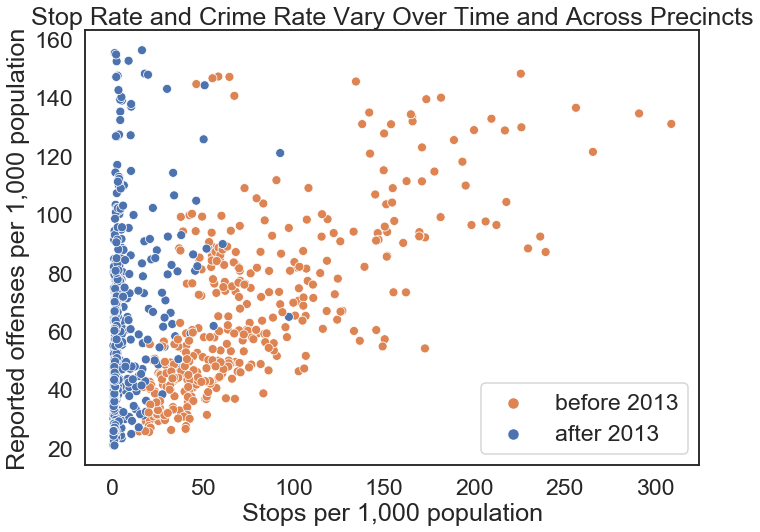

In [118]:
ax = sns.scatterplot(x='stoprate', y='crimerate', hue = 'policy', data = df)
ax.set_xlabel('Stops per 1,000 population')
ax.set_ylabel('Reported offenses per 1,000 population')
ax.set_title('Stop Rate and Crime Rate Vary Over Time and Across Precincts')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles[::-1], labels=labels[::-2])
leg = ax.get_legend()
for t, l in zip(leg.texts, ['before 2013','after 2013']): t.set_text(l)

In [63]:
x_vars = ['nonstop_arrestrate']
results = dm.run_ols(df, x_vars, 'crimerate')
results['result'].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              crimerate   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     2866.
Date:                Wed, 04 Dec 2019   Prob (F-statistic):          2.78e-240
Time:                        13:24:35   Log-Likelihood:                -2549.1
No. Observations:                 651   AIC:                             5102.
Df Residuals:                     649   BIC:                             5111.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             26.9498      0.862     31.278      0.000      25.258      28.642
nonstop_arrestrate     0.8170      0.015     53.539      0.000       0.787       0.847
==============================================================================
Omnibus:                       96.583   Durbin-Watson:                   2.096
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              306.914
Skew:                           0.697   Prob(JB):                     2.26e-67
Kurtosis:                       6.061   Cond. No.                         102.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [65]:
y_hat = results['result'].predict(df['nonstop_arrestrate'])

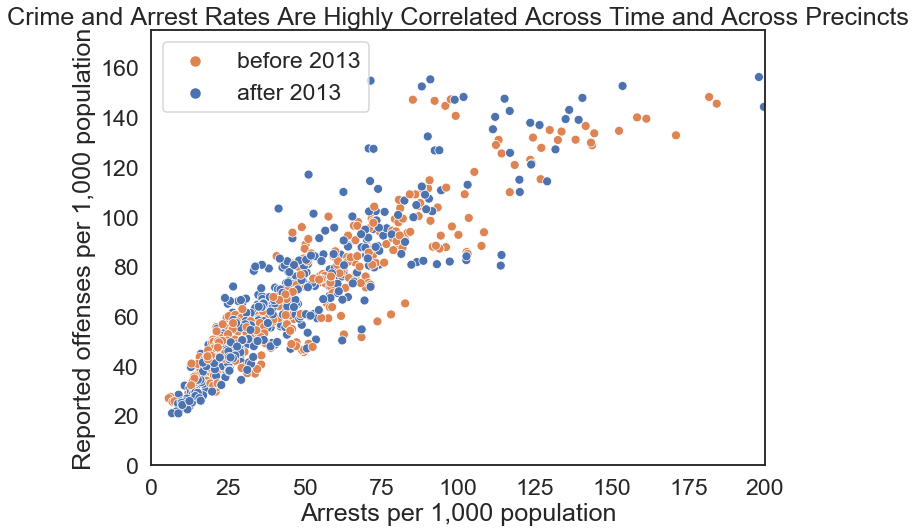

In [117]:
ax = sns.scatterplot(x = 'nonstop_arrestrate', y = 'crimerate', hue='policy', data = df)
ax.set_ylim(0,175)
ax.set_xlim(0,200)
ax.set_xlabel('Arrests per 1,000 population')
ax.set_ylabel('Reported offenses per 1,000 population')
ax.set_title('Crime and Arrest Rates Are Highly Correlated Across Time and Across Precincts')
# sns.lineplot(df['nonstop_arrestrate'], y_hat, color='gray')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles[::-1], labels=labels[::-2])
leg = ax.get_legend()
for t, l in zip(leg.texts, ['before 2013','after 2013']): t.set_text(l)

In [33]:
df

,year,pct,cmplnts,population,arrests,stops,stop_arrests,policy,nonstop_arrests,crimerate,nonstop_arrestrate,stoprate,stop_arrestrate,arrestrate,normal_year
2,2008.0,1.0,6614.0,66679.0,5008.0,2506.0,221.0,1,4787.0,99.191650,71.791719,37.583047,3.314387,75.106105,1.0
3,2009.0,1.0,6280.0,66679.0,5371.0,2585.0,238.0,1,5133.0,94.182576,76.980759,38.767828,3.569340,80.550098,2.0
4,2010.0,1.0,5895.0,66679.0,4950.0,2446.0,260.0,1,4690.0,88.408644,70.336988,36.683214,3.899279,74.236266,3.0
5,2011.0,1.0,5955.0,66679.0,5583.0,3626.0,215.0,1,5368.0,89.308478,80.505107,54.379940,3.224403,83.729510,4.0
6,2012.0,1.0,6287.0,66679.0,5479.0,3053.0,189.0,1,5290.0,94.287557,79.335323,45.786529,2.834476,82.169799,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
983,2014.0,123.0,2859.0,98032.0,1555.0,321.0,70.0,0,1485.0,29.163946,15.148115,3.274441,0.714053,15.862167,7.0
984,2015.0,123.0,2732.0,98032.0,1439.0,127.0,30.0,0,1409.0,27.868451,14.372858,1.295495,0.306023,14.678880,8.0
985,2016.0,123.0,2648.0,98032.0,1568.0,90.0,32.0,0,1536.0,27.011588,15.668353,0.918068,0.326424,15.994777,9.0
986,2017.0,123.0,2549.0,98032.0,1602.0,62.0,23.0,0,1579.0,26.001714,16.106985,0.632447,0.234617,16.341603,10.0


In [35]:
df.crimerate.shape[0]

814

In [90]:
import pandas as pd
ALL_VARS = ['nonstop_arrestrate', 'stoprate', 'policy']
split = dm.load_split(df[ALL_VARS], df['crimerate'])
train = pd.DataFrame(split['X_train']).join(split['y_train'])

result = dm.run_ols_no_split(train, 'nonstop_arrestrate', 'crimerate')
result.summary()
res = split['y_train']-result.predict(split['X_train'])

In [89]:
split['X_train']

,nonstop_arrestrate,stoprate
257,72.213921,3.030645
115,21.282511,0.543437
60,47.551771,7.770496
579,26.871584,17.943437
67,67.317656,83.957752
...,...,...
550,37.295225,64.052930
423,19.681479,8.975619
981,12.985556,19.789457
108,22.988651,23.279327


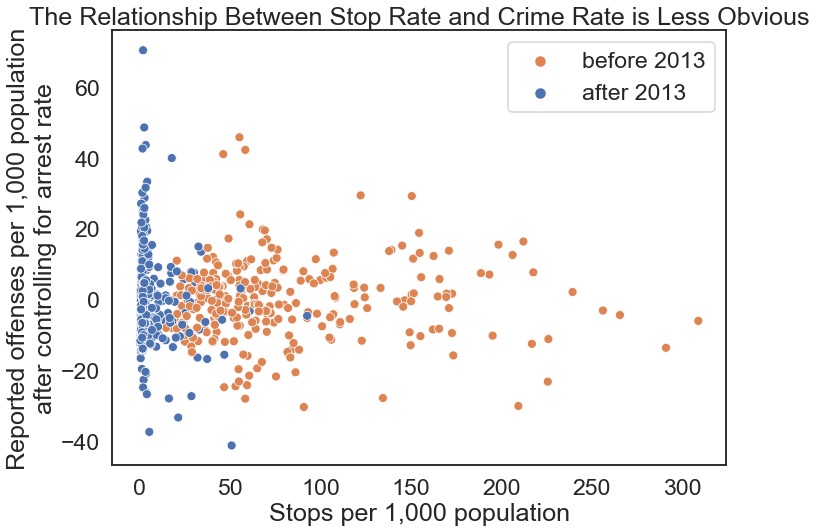

In [116]:
fig, ax = plt.subplots()
sns.scatterplot(x = 'stoprate', y = res, data=split['X_train'], hue='policy', ax=ax)
ax.set_xlabel('Stops per 1,000 population')
ax.set_ylabel('Reported offenses per 1,000 population\nafter controlling for arrest rate')
ax.set_title('The Relationship Between Stop Rate and Crime Rate is Less Obvious')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles[::-1], labels=labels[::-2])
leg = ax.get_legend()
for t, l in zip(leg.texts, ['before 2013','after 2013']): t.set_text(l)


In [119]:
"+".join(['abc'])

'abc'